# Lab 2 - Merge Sort
## Ryley Powell
## CS3851 - 021

# Introduction
In this lab, we are constructing the MergeSort algorithm and benchmarking it against the Insertion Sort algorithm implemented in the previous lab.

Given below is a table summarizing the average run-times for each benchmark given in seconds.

| Case | 100 Elements | 1,000 Elements | 10,000 Elements | 100,000 Elements |
| ---- | ------------ | -------------- | --------------- | ---------------- |
| Insertion Sort - Reversed Case | 0.0018068400001538976 | 1.1850100300000577 | 149.49226382 | 16324.54671948 |
| Insertion Sort - Random Case | 0.0007629900000210909 | 0.5048954599999433 | 65.51639731000009 | 7191.216764080001 |
| Insertion Sort - Sorted Case | 7.634000003235997e-05 | 0.0003196200000729732 | 0.012115209999910804 | 0.18647700999972586 |
| MergeSort - Reversed Case | 0.0003732300003321143 | 0.005980810000255588 | 0.4107730300002004 | 7.906393469999602 |
| MergeSort - Random Case | 0.00043051999964518475 | 0.010449209999569576 | 0.6472807800004375 | 9.848672920000899 |
| MergeSort - Sorted Case | 0.0003751200005353894 | 0.011127489999125828 | 0.448880939999799 | 7.537390779999623 |

# Benchmarking
**Note: Due to how I wrote the benchmarks, the Sorted Case is *actually* the Reversed Case and vice versa in the code provided below.**

In [19]:
import threading
import numpy as num
from threaded_sorting import insertion_thread, merge_thread

numbers = [100, 1000, 10000, 100000]
# numbers = [100, 1000, 10000]
# numbers = [100, 1000]
# numbers = [10]
sorted_case = []
random_case = []
reversed_case = []

insertion_sorted_avg = []
insertion_random_avg = []
insertion_reversed_avg = []

merge_sorted_avg = []
merge_random_avg = []
merge_reversed_avg = []

threads = []

# do insertion sort trials
for i in numbers:
    for j in range(0, 10):
        t = threading.Thread(target=insertion_thread, args=(i, sorted_case, random_case, reversed_case))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
        # print(t, ' is done')            
    insertion_sorted_avg.append(num.mean(sorted_case))
    insertion_random_avg.append(num.mean(random_case))
    insertion_reversed_avg.append(num.mean(reversed_case))
    
    # clear working lists
    threads.clear()
    sorted_case.clear()
    random_case.clear()
    reversed_case.clear()
    
# do merge sort trails
for i in numbers:
    for j in range(0, 10):
        t = threading.Thread(target=merge_thread, args=(i, sorted_case, random_case, reversed_case))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
        # print(t, ' is done')            
    merge_sorted_avg.append(num.mean(sorted_case))
    merge_random_avg.append(num.mean(random_case))
    merge_reversed_avg.append(num.mean(reversed_case))
    
    # clear working lists
    threads.clear()
    sorted_case.clear()
    random_case.clear()
    reversed_case.clear()

print("Insertion Sort - Sorted Case: ", insertion_sorted_avg)
print("Insertion Sort - Random Case: ", insertion_random_avg)
print("Insertion Sort - Reversed Case: ", insertion_reversed_avg)

print("MergeSort - Sorted Case: ", merge_sorted_avg)
print("MergeSort - Random Case: ", merge_random_avg)
print("MergeSort - Reversed Case: ", merge_reversed_avg)

Insertion Sort - Sorted Case:  [0.0018068400001538976, 1.1850100300000577, 149.49226382, 16324.54671948]
Insertion Sort - Random Case:  [0.0007629900000210909, 0.5048954599999433, 65.51639731000009, 7191.216764080001]
Insertion Sort - Reversed Case:  [7.634000003235997e-05, 0.0003196200000729732, 0.012115209999910804, 0.18647700999972586]
MergeSort - Sorted Case:  [0.0003732300003321143, 0.005980810000255588, 0.4107730300002004, 7.906393469999602]
MergeSort - Random Case:  [0.00043051999964518475, 0.010449209999569576, 0.6472807800004375, 9.848672920000899]
MergeSort - Reversed Case:  [0.0003751200005353894, 0.011127489999125828, 0.448880939999799, 7.537390779999623]


# Plots
## MergeSort

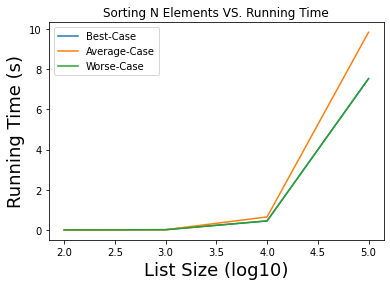

In [20]:
import matplotlib.pyplot as mat
mat.figure(0)
mat.plot(num.log10(numbers), merge_reversed_avg, label='Sorted-Case')
mat.plot(num.log10(numbers), merge_random_avg, label='Random-Case')
mat.plot(num.log10(numbers), merge_reversed_avg, label='Reversed-Case')
mat.xlabel('List Size (log10)', fontsize=18)
mat.ylabel('Running Time (s)', fontsize=18)
mat.title('Sorting N Elements VS. Running Time')
mat.legend()
mat.show()

## MergeSort vs. Insertion Sort

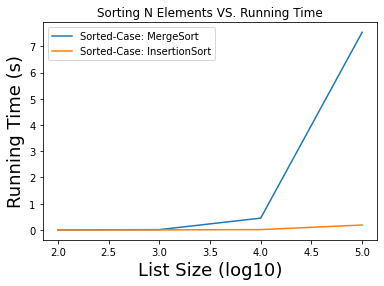

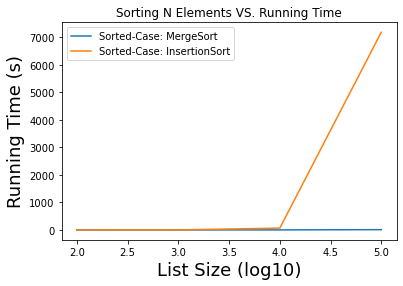

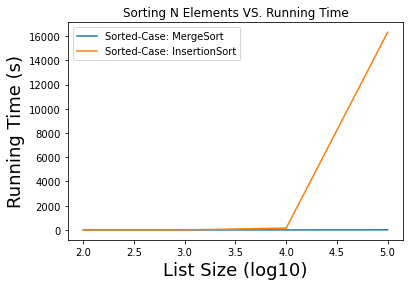

In [22]:
mat.figure(1)
mat.plot(num.log10(numbers), merge_reversed_avg, label='Sorted-Case: MergeSort')
mat.plot(num.log10(numbers), insertion_reversed_avg, label='Sorted-Case: InsertionSort')
mat.xlabel('List Size (log10)', fontsize=18)
mat.ylabel('Running Time (s)', fontsize=18)
mat.title('Sorting N Elements VS. Running Time')
mat.legend()
mat.show()

mat.figure(2)
mat.plot(num.log10(numbers), merge_random_avg, label='Sorted-Case: MergeSort')
mat.plot(num.log10(numbers), insertion_random_avg, label='Sorted-Case: InsertionSort')
mat.xlabel('List Size (log10)', fontsize=18)
mat.ylabel('Running Time (s)', fontsize=18)
mat.title('Sorting N Elements VS. Running Time')
mat.legend()
mat.show()

mat.figure(3)
mat.plot(num.log10(numbers), merge_sorted_avg, label='Sorted-Case: MergeSort')
mat.plot(num.log10(numbers), insertion_sorted_avg, label='Sorted-Case: InsertionSort')
mat.xlabel('List Size (log10)', fontsize=18)
mat.ylabel('Running Time (s)', fontsize=18)
mat.title('Sorting N Elements VS. Running Time')
mat.legend()
mat.show()

# Questions

### 1. Were there any differences between the run times of the three cases for merge sort? What inputs gave the best-, worst-, and average-case runs time?
Considering sorting 100,000 elements, there was not a significant difference between the three-case. Rather they varied slightly which is due to the number of comparisons each case made. I found that the sorted-list gave the best run-time, the reversed-list gave a slighty worse time (a difference of 0.4 seconds) than that of the sorted-list, and finally that random-list gave the worst run-time being close to 2 seconds slower than the sorted- and reversed- lists. 
### 2. Why do you think the different inputs caused different run times for merge sort? 
The different times were caused by the number of comparisons that were made for each input. 
### 3. Look up the best-, worst-, and average-case run time of merge sort in big-oh notation and provide those. Are the formally determined run times consistent with your benchmarks?
All of the above cases are *O(nlog(n))* for MergeSort. The benchmark time's follow the asymptotic time complexity, however, the benchmarked time could be better than was tested for as I had multiple tabs of Chrome, another instance of PyCharm open, context switching between threads on my quad-core intel i7, etc., running in the background.
### 4. Were there any differences between the run times of the three cases for insertion sort vs merge sort? 
Yes, the random-list and reversed-list times for insertion sort required significantly more time than that of Merge-Sort as the input size grew. Very noticeable difference started at 10,000 elements. However, the sorted-list for insertion sort *always* performed better than any input, sorted/shuffled/reversed, of the same size given to MergeSort, which exemplifies the *O(n)* nature of insertion sort when the data is pre-sorted.
### 5. Why do you think the different inputs caused different run times for insertion sort vs merge sort? Why do you think the best-case run time of insertion sort is faster than merge sort?
Both algorithms are comparison based, thus how they are structured makes a significant impact on how many instructions are required to complete the sort. Insertion Sort iterates over the dataset twice, and thus grows exponentially with increasing input size. MergeSort divides the problem into smaller sub-problems (which takes *log(n)* time), and then combines these sub-problems (taking *n*) time, and thus the over-all run-time is *nlog(n)*.
Insertion-Sort performs so well in the sorted-case because the comparison made to enter the inner loop will always fail, and thus only iterates over the data-set once, or rather completes *n* instructions, while Merge-Sort, regardless of the ordering of the input will still *divide and conquer* the input and differences are minimal between each case as mentioned above for Q1.
### 6 Are the formally determined run times (in terms of big-oh) consistent with your benchmarks?
Yes, for the same reasoning as provided in Q3.


s